## # Introduction
<p><img src="https://assets.datacamp.com/production/project_981/img/lego_unsplash.jpg" alt="A picture of Lego characters!"></p>
<h3 id="letslookatlegosets">Let's look at Lego sets!</h3>
<p>Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.</p>
<p>It may not be widely known, but Lego has had its share of ups and downs since its inception in the early 20th century. This includes a particularly rough period in the late 90s. As described in <a href="https://www.businessinsider.com/how-lego-made-a-huge-turnaround-2014-2?r=US&IR=T">this article</a>, Lego was only able to survive due to a successful internal brand (Bionicle) and the introduction of its first licensed series: Star Wars. In the instructions panel are the two questions you will need to answer to complete this project.</p>
<p>Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:<br><br></p>
<div style="background-color: #ebf4f7; color: #595959; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/lego_sets.csv</b></div>
<ul>
    <li><b>set_num:</b> A code that is unique to each set in the dataset. <b><i>This column is critical, and a missing value indicates the set is a duplicate or invalid!</i></b></li>
    <li><b>set_name:</b> A name for every set in the dataset (note that this can be the same for different sets).</li>
    <li><b>year:</b> The date the set was released.</li>
    <li><b>num_parts:</b> The number of parts contained in the set.<b><i> This column is not central to our analyses, so missing values are acceptable.</i></b></li>
        <li><b>theme_name:</b> The name of the sub-theme of the set.</li>
    <li><b>parent_theme:</b> The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.</li>
</ul>

<div style="font-size:20px"><b>datasets/parent_themes.csv</b></div>
<ul>
    <li><b>id:</b> A code that is unique to every theme.</li>
    <li><b>name:</b> The name of the parent theme.</li>
    <li><b>is_licensed:</b> A Boolean column specifying whether the theme is a licensed theme.</li>
</ul>
    </div>
<p>From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the two questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><em><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. In this project, you also need to know your way around <code>pandas</code> DataFrames and it's recommended that you take a look at the course <a href="https://www.datacamp.com/courses/data-manipulation-with-pandas">Data Manipulation with pandas</a>.</em></p>

In [2]:
# Use this cell to begin your analyses, and add as many cells as you would like!
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
lego_sets = pd.read_csv('datasets/lego_sets.csv')
parent_themes = pd.read_csv('datasets/parent_themes.csv')

## Data Wrangling

## Logo_sets dataframe

As stated above, we need to clean our logo_sets dataframe. We need to remove the duplicates and the missing values in the set_num column

In [4]:
display(lego_sets.head())
display(lego_sets.isna().sum())

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


set_num          153
name             153
year               0
num_parts       5060
theme_name       153
parent_theme       0
dtype: int64

In [5]:
#Remove the unnecessary column, the num_parts
lego_sets.drop(columns = 'num_parts', inplace = True)
lego_sets.shape

(11986, 5)

In [6]:
lego_sets = lego_sets[pd.notnull(lego_sets['set_num'])]
lego_sets.drop_duplicates(keep = 'first', inplace = True)
lego_sets.shape

(11833, 5)

## Parent_themes dataframe

In [7]:
parent_themes.shape

(111, 3)

In [8]:
parent_themes.isna().sum()

id             0
name           0
is_licensed    0
dtype: int64

In [9]:
parent_themes.duplicated().sum()

0

In [10]:
parent_themes.dtypes

id              int64
name           object
is_licensed      bool
dtype: object

Parent_themes DataFrame is clean and we will proceed to merging

In [11]:
#We rename the name column in the parent_theme to parent_theme to match the parenth_theme column in lego_sets
parent_themes.rename(columns = {'name':'parent_theme'}, inplace = True)

In [12]:
merged = pd.merge(lego_sets, parent_themes, on = 'parent_theme', how = 'inner')
merged.head()

,set_num,name,year,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,Building,Legoland,411,False


# Data Exploration

Text(0.5, 1.0, 'Top 5 parent themes count')

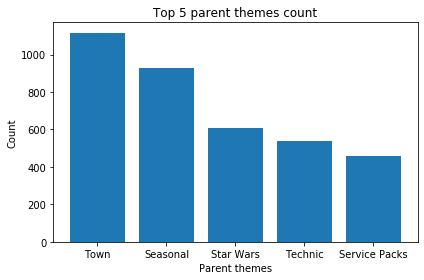

In [13]:
top_5 = merged.parent_theme.value_counts().nlargest(n=5).reset_index().rename(columns = {'index':'parent_theme','parent_theme':'count'})
plt.bar(x = 'parent_theme', height = 'count', data = top_5)
plt.xlabel('Parent themes')
plt.ylabel('Count')
plt.title('Top 5 parent themes count')

# Question Number 1

We first need to filter the merged DataFrame to just include the ones with licensed ones

In [14]:
licensed = merged[merged.is_licensed == True]
q1 = licensed
q1.head()


,set_num,name,year,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,Star Wars Episode 4/5/6,Star Wars,158,True


In [15]:
#Find the value counts of Star Wars 
q1.parent_theme.value_counts()


Star Wars                           609
Super Heroes                        242
Harry Potter                         67
The Hobbit and Lord of the Rings     40
Minecraft                            30
Disney Princess                      29
Cars                                 27
Teenage Mutant Ninja Turtles         21
Indiana Jones                        19
Pirates of the Caribbean             17
Toy Story                            15
SpongeBob SquarePants                14
The Lone Ranger                       8
Jurassic World                        7
Ben 10                                6
Prince of Persia                      6
Angry Birds                           6
Disney's Mickey Mouse                 6
Scooby-Doo                            6
Avatar                                2
Disney                                1
Ghostbusters                          1
Name: parent_theme, dtype: int64

Text(0.5, 1.0, 'Top 5 Licensed Theme Count')

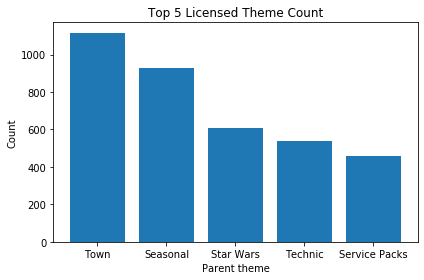

In [16]:
q1.top_5 = merged.parent_theme.value_counts().nlargest(n=5).reset_index().rename(columns = {'index':'parent_theme','parent_theme':'count'})
plt.bar(x = 'parent_theme', height = 'count', data = q1.top_5)
plt.xlabel("Parent theme")
plt.ylabel("Count")
plt.title("Top 5 Licensed Theme Count")

In [17]:
star_wars = q1.parent_theme.value_counts()[0]

In [18]:
#Find the total counts and then divide star_wars by the total
total = q1.parent_theme.value_counts().sum()
the_force = round(star_wars/total*100)
print("The percentage of all licensed sets ever released that were Star Wars themed is "+str(the_force) + ".")

The percentage of all licensed sets ever released that were Star Wars themed is 52.


# Question 2

To get what we want, we first need to group the data frame by year and find the count of each parent theme 

In [19]:
grouped = licensed.groupby(['year','parent_theme']).size().reset_index().rename(columns = {0: 'Count'}).sort_values(by = ['year','Count'])
display(grouped)

,year,parent_theme,Count
0,1999,Star Wars,13
1,2000,Disney's Mickey Mouse,5
2,2000,Star Wars,26
3,2001,Harry Potter,11
4,2001,Star Wars,14
...,...,...,...
80,2017,Pirates of the Caribbean,1
78,2017,Disney Princess,6
79,2017,Minecraft,9
81,2017,Star Wars,55


In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(grouped)

    year                      parent_theme  Count
0   1999                         Star Wars     13
1   2000             Disney's Mickey Mouse      5
2   2000                         Star Wars     26
3   2001                      Harry Potter     11
4   2001                         Star Wars     14
7   2002                      Super Heroes      3
5   2002                      Harry Potter     19
6   2002                         Star Wars     28
8   2003                      Harry Potter      3
10  2003                      Super Heroes      5
9   2003                         Star Wars     32
13  2004                      Super Heroes      6
11  2004                      Harry Potter     14
12  2004                         Star Wars     20
14  2005             Disney's Mickey Mouse      1
17  2005                      Super Heroes      1
15  2005                      Harry Potter      5
16  2005                         Star Wars     28
18  2006                            Avatar      2


In [21]:

max_count = grouped.groupby(['year'], as_index=False).agg({'Count':np.max})
max_count

,year,Count
0,1999,13
1,2000,26
2,2001,14
3,2002,28
4,2003,32
5,2004,20
6,2005,28
7,2006,11
8,2007,16
9,2008,23


In [48]:
#Let's create a DataFrame such that the popular theme per year is stored
pop_theme = {}
year_init = 1999
for counts in max_count.Count:
    for year in grouped.year:
        if year == year_init:
            
            pop_theme[year_init] = grouped[(grouped['Count'] == counts) & (grouped['year'] == year)]['parent_theme'].item()
    year_init+=1
pop_theme = pd.DataFrame(pop_theme, index = ['Theme']).transpose().reset_index().rename(columns = {'index':'Year'})
pop_theme

,Year,Theme
0,1999,Star Wars
1,2000,Star Wars
2,2001,Star Wars
3,2002,Star Wars
4,2003,Star Wars
5,2004,Star Wars
6,2005,Star Wars
7,2006,Star Wars
8,2007,Star Wars
9,2008,Star Wars


In [52]:
#Moment of Truth
new_era = pop_theme[pop_theme['Theme'] != 'Star Wars']['Year'].item()

In [214]:
#Finally, we find the year of the minimum star_wars count and then find the corresponding year
new_era = grouped[grouped['count'] == min(grouped['count'])]['year'].item()
print(f"The year {new_era} was the year in which Star was not the most popular licensed theme.")

The year 2006 was the year in which Star was not the most popular licensed theme.
